# **Mini-projeto: Árvores de Decisão**

## Equipe:
- Breno Mendes de Melo Uchoa Cavalcanti
- Elisson Rodrigo da Silva Araújo
- Maria Clara Alves Acruchi
- Maria Luísa dos Santos Silva
- Victor Silva Marques de Oliveira


# **Visualização dos dados**

In [1]:
import pandas as pd
df = pd.read_csv('/Users/victor/Downloads/si_2/train.csv')
df_test = pd.read_csv('/Users/victor/Downloads/si_2/test.csv')

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Limpeza dos dados**

A partir da informação do dataframe, percebe-se que os atributos 'Embarked', 'Cabin' e 'Age' possuem alguns valores nulos.

In [99]:
print(df[df['Age'].isnull()].shape)
print(df[df['Cabin'].isnull()].shape)
print(df[df['Embarked'].isnull()].shape)

(177, 12)
(687, 12)
(2, 12)


A coluna 'Cabin' possuía, em sua maioria, valores nulos. Assim, optou-se pela remoção dessa coluna, uma vez que o preenchimento desses dados poderia atrapalhar na classificação.

In [100]:
# Remoção da coluna 'Cabin'
df.drop('Cabin', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


A coluna 'Embarked' possui apenas dois valores nulos, estes valores foram removidos, pois essa remoção não iria ter grande influência no resultado final.

In [101]:
# Remoção dos valores nulos de 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB



Para a coluna 'Age', decidiu-se preencher os dados faltantes com a mediana da idade por classe.

In [102]:
# Descobrindo a mediana das idades por classe

median_1st_class = df[df['Pclass'] == 1]['Age'].median()
median_2nd_class = df[df['Pclass'] == 2]['Age'].median()
median_3rd_class = df[df['Pclass'] == 3]['Age'].median()

print('Mediana da idade 1ª classe:', median_1st_class)
print('Mediana da idade 2ª classe:', median_2nd_class)
print('Mediana da idade 3ª classe:', median_3rd_class)

Mediana da idade 1ª classe: 37.0
Mediana da idade 2ª classe: 29.0
Mediana da idade 3ª classe: 24.0


In [103]:
def age_fill(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return median_1st_class
        if Pclass == 2:
            return median_2nd_class
        else:
            return median_3rd_class
    else:
        return Age

In [104]:
df['Age'] = df[['Age','Pclass']].apply(age_fill, axis = 1)
df_test['Age'] = df_test[['Age','Pclass']].apply(age_fill, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


Como as colunas 'PassengerId' e 'Ticket' representam valores únicos que não influenciam na classificação, estas também foram removidas

In [105]:
# Remoção das colunas 'PassengerId' e 'Ticket'
df.drop('PassengerId', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.head()
df_copy = df_test.copy()
df_test.drop('PassengerId', axis = 1, inplace = True)
df_test.drop('Ticket', axis = 1, inplace = True)


# **Análise dos dados**

O objetivo da análise dos dados foi de encontrar as variáveis que melhor se relacionavam com a chance de sobreviver dos passageiros.

In [27]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

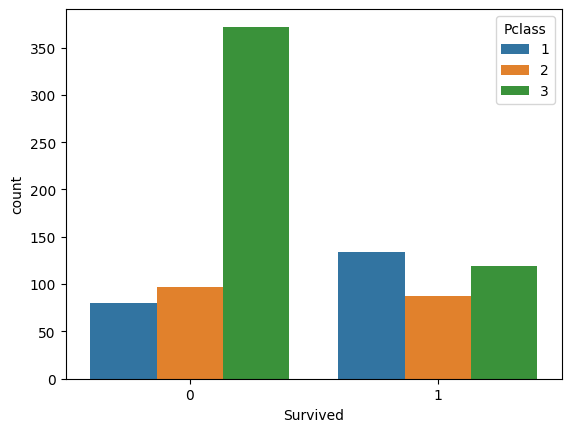

In [28]:
sns.countplot(data = df, x = 'Survived', hue= 'Pclass')

<Axes: xlabel='Survived', ylabel='count'>

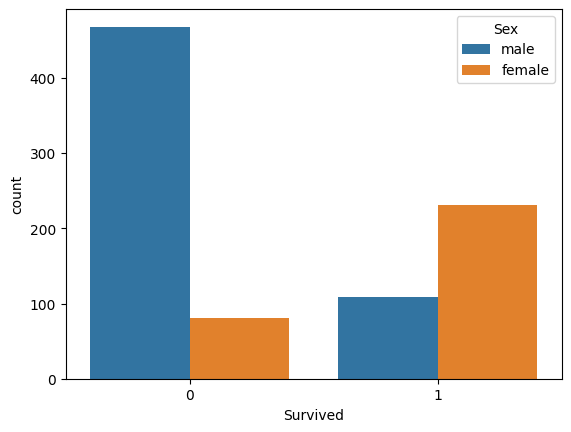

In [29]:
sns.countplot(data = df, x = 'Survived', hue= 'Sex')

<Axes: xlabel='Survived', ylabel='count'>

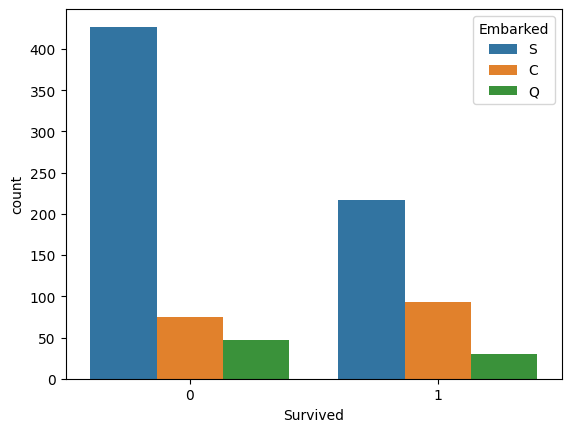

In [30]:
sns.countplot(data = df, x = 'Survived', hue= 'Embarked')

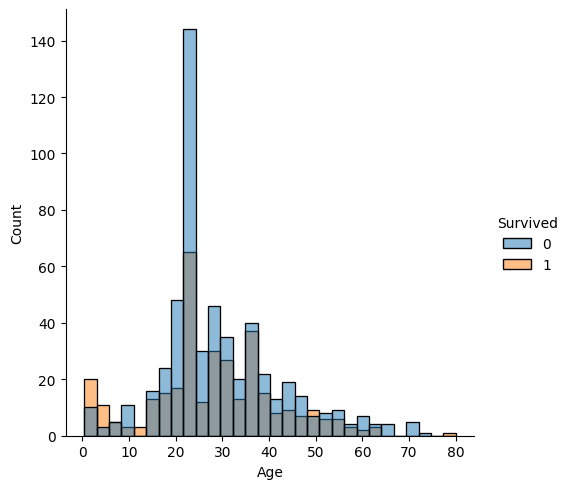

In [31]:

sns.displot(data = df, x = 'Age', bins=30, hue='Survived')

A partir da visualização gráfica dos dados, é possível perceber a relação entre as variáveis e a classificação de sobrevivência.

Por exemplo, a chance de sobreviver é maior entre pessoas do sexo feminino do que masculino. Além disso, chance de não sobreviver é maior entre as pessoas que estavam terceira classe.

In [53]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [58]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
print(df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [61]:
print(df_test[['Title']].groupby(['Title'], as_index=False).mean())

    Title
0  Master
1    Miss
2      Mr
3     Mrs
4    Rare


In [62]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df_test['Title'] = df_test['Title'].map(title_mapping)
df_test['Title'] = df_test['Title'].fillna(0)
df_test['Sex'] = df_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,1


Foi analisado também a relação entre o título no nome de cada passageiro e a sobrevivência e foi percebido que as pessoas comtítulo de 'Master' tiveram mais chance de sobreviver

# **Criando base de teste e treino**

As colunas 'Name', 'Embarked', 'Fare' e 'Cabin' foram desconsideradas ao criar as bases, pois possuíam muitos valores nulos ou seus valores não se mostraram relevantes para a classificação após a análise dos dados.

In [72]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis = 1)
X.drop('Name', axis = 1, inplace = True)
X.drop('Embarked', axis = 1, inplace = True)
X.drop('Fare', axis = 1, inplace = True)
X.drop('Cabin', axis = 1, inplace = True)

X_test = df_test.drop('Name', axis = 1)
X_test.drop('Embarked', axis = 1, inplace = True)
X_test.drop('Fare', axis = 1, inplace = True)
X_test.drop('Cabin', axis = 1, inplace = True)


y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# **Árvore de decisão**

Utilizou-se a ferramenta optuna para encontrar os melhores hiperparâmetros e a melhor acurácia para o modelo. Em seguida, esses parâmetros foram utilizados para criar o modelo da árvore de decisão.

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import optuna

In [118]:
def objective(trial):

    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 2, 64, log=True)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 64, log=True)
    min_impurity_decrease = trial.suggest_float('min_impurity_decrease', 0.0, 0.5)
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])

    clf = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        max_leaf_nodes=max_leaf_nodes,
        min_impurity_decrease=min_impurity_decrease,
        class_weight=class_weight,
    )
    clf.fit(X_train, y_train)
    

    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=1000, n_jobs=-1, timeout=600 * 3)

[I 2023-09-14 23:16:03,728] A new study created in memory with name: no-name-9ec383cc-d337-4b7e-9124-bf94290c4c66
/home/bmmuc/.pyenv/versions/3.8.0/envs/estat/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
[I 2023-09-14 23:16:03,776] Trial 0 finished with value: 0.7821229050279329 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 0.3012529181594223, 'min_samples_leaf': 0.3045025172388731, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.14885661158827596, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.7821229050279329.
/home/bmmuc/.pyenv/versions/3.8.0/envs/estat/lib/python3.8/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep th

In [123]:
print(f"Melhor acurácia: {study.best_value:.4f}")
print("Melhores hiperparâmetros:", study.best_params)

Melhor acurácia: 0.7821
Melhores hiperparâmetros: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 0.3012529181594223, 'min_samples_leaf': 0.3045025172388731, 'max_features': 'sqrt', 'max_leaf_nodes': 3, 'min_impurity_decrease': 0.14885661158827596, 'class_weight': 'balanced'}


In [129]:
# Cria o modelo com os melhores parâmetros gerados pelo optuna
model = DecisionTreeClassifier(**study.best_params)

In [130]:
model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, max_features='sqrt', max_leaf_nodes=3,
                       min_impurity_decrease=0.14885661158827596,
                       min_samples_leaf=0.3045025172388731,
                       min_samples_split=0.3012529181594223)

In [132]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Avalia o modelo usando 10-fold cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1)

# Computa a média dos scores e seus desvios padrão
print('acuracia: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

acuracia: 0.70 +/- 0.19


In [133]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Title
0,3,0,34.5,0,0,1
1,3,1,47.0,1,0,3
2,2,0,62.0,0,0,1
3,3,0,27.0,0,0,1
4,3,1,22.0,1,1,3
...,...,...,...,...,...,...
413,3,0,24.0,0,0,1
414,1,1,39.0,0,0,5
415,3,0,38.5,0,0,1
416,3,0,24.0,0,0,1


In [134]:
# Treina modelo com dados de treino e faz a previsão para os dados de teste
model.fit(X, y)
x_pred = model.predict(X_test)

[Text(0.5, 0.75, 'Title <= 1.5\nentropy = 1.0\nsamples = 891\nvalue = [445.5, 445.5]\nclass = Not survived'),
 Text(0.25, 0.25, 'entropy = 0.778\nsamples = 517\nvalue = [353.803, 105.513]\nclass = Not survived'),
 Text(0.75, 0.25, 'entropy = 0.746\nsamples = 374\nvalue = [91.697, 339.987]\nclass = survived')]

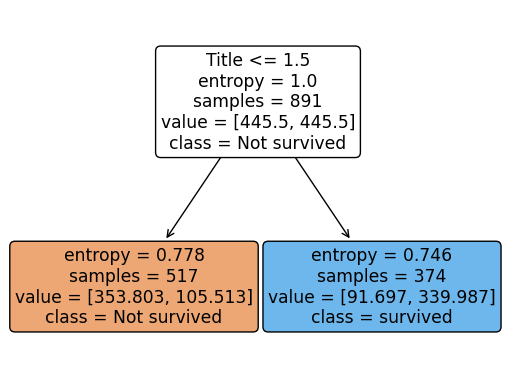

In [147]:
# Cria visualização gráfica da árvore de decisão
from sklearn.tree import plot_tree
plot_tree(model, filled=True, rounded=True, class_names=['Not survived', 'survived'], feature_names=X.columns)

In [135]:
df_copy

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,NaN,S


In [136]:
# Salva os passageiros com sua classificação prevista
df_submission = pd.DataFrame({'PassengerId': df_copy['PassengerId'], 'Survived': x_pred})

In [137]:
# Salvando o dataframe de submissão em um CSV
df_submission.to_csv('submission2.csv', index=False)

Após a submissão, encontrou-se acurácia de 0,75119 para o modelo.